In [39]:
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df = pd.read_json("./data/all-data-raw-standard-tags.json")

In [48]:
df = df.drop(columns="tags")
df['tags'] = df['standard_tags']

In [49]:
df.head()

,title,category,checklists,section_content,filename,word_count,standard_tags,tags
0,Computation of Time Periods,FYI,[],Title is Computation of Time Periods\nSection ...,"Abbvie - 6,000,000,000 TERM LOAN CREDIT AGREEM...",51,NA,NA
1,Accounting Terms,FYI,[],Title is Accounting Terms\nSection 1.03. Accou...,"Abbvie - 6,000,000,000 TERM LOAN CREDIT AGREEM...",430,NA,NA
2,Terms Generally,FYI,[],Title is Terms Generally\nSection 1.04. Terms ...,"Abbvie - 6,000,000,000 TERM LOAN CREDIT AGREEM...",255,NA,NA
3,Divisions,FYI,[],Title is Divisions\nSection 1.05. Divisions. F...,"Abbvie - 6,000,000,000 TERM LOAN CREDIT AGREEM...",106,NA,NA
4,The Advances,FYI,[],Title is The Advances\nSection 2.01. The Advan...,"Abbvie - 6,000,000,000 TERM LOAN CREDIT AGREEM...",571,Facilities / Instrument,Facilities / Instrument


In [53]:
tag_agg = df[['tags']].groupby('tags').size().reset_index().rename(columns={0:'freq'}).sort_values(by='freq', ascending=False)

In [59]:
tag_agg

,tags,freq
14,NA,10980
8,Facilities / Instrument,169
0,Amendments,163
5,Consequences of Default,137
20,Pricing / Interest,137
11,Governing Laws,112
1,Amortization Schedule / Loan Repayment,109
17,Permitted Liens,107
3,Assignments,104
21,Reporting Requirements,104


In [56]:
import numpy as np

In [98]:
x = tag_agg.tags.values
y = tag_agg.freq.values

In [100]:
class_counts = {f'Class_{chr(i)}': np.random.randint(1, 100) for i in range(65, 91)}  # A-Z classes

# Using a colormap for 26 tags
colors = sns.color_palette("coolwarm", len(class_counts))

/tmp/ipykernel_113/2334198630.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y, y=x, orient='h', palette=colors, width=0.9)


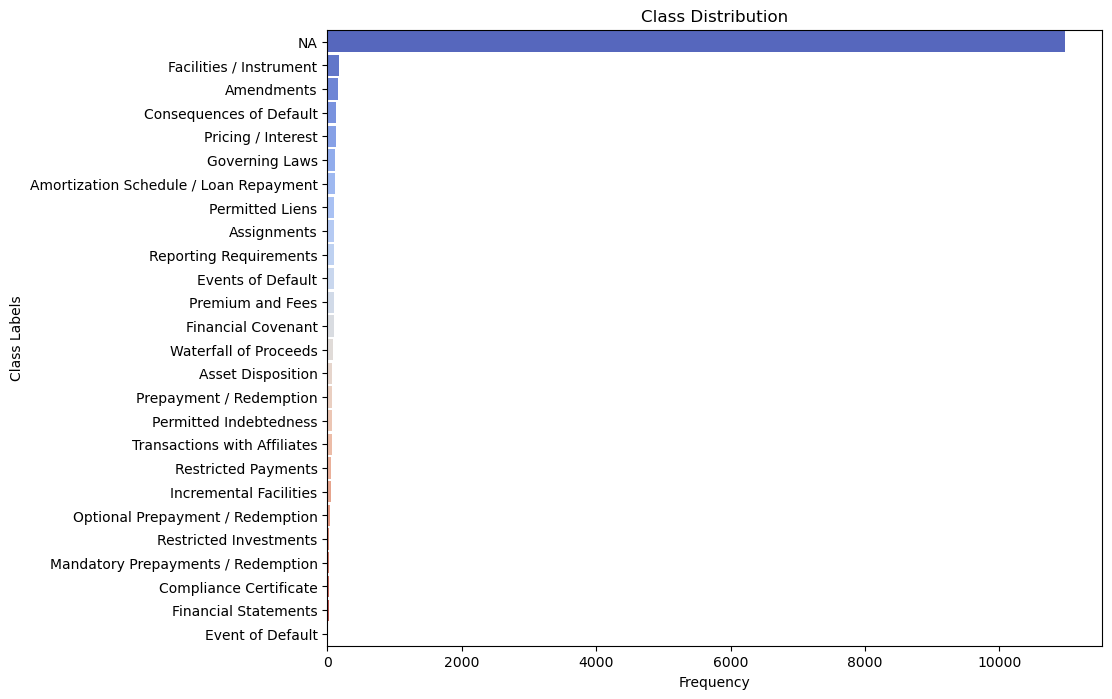

In [101]:
plt.figure(figsize=(10, 8))
sns.barplot(x=y, y=x, orient='h', palette=colors, width=0.9)
plt.ylabel('Class Labels')
plt.xlabel('Frequency')
plt.title('Class Distribution')
plt.xticks(rotation=0)
plt.show()

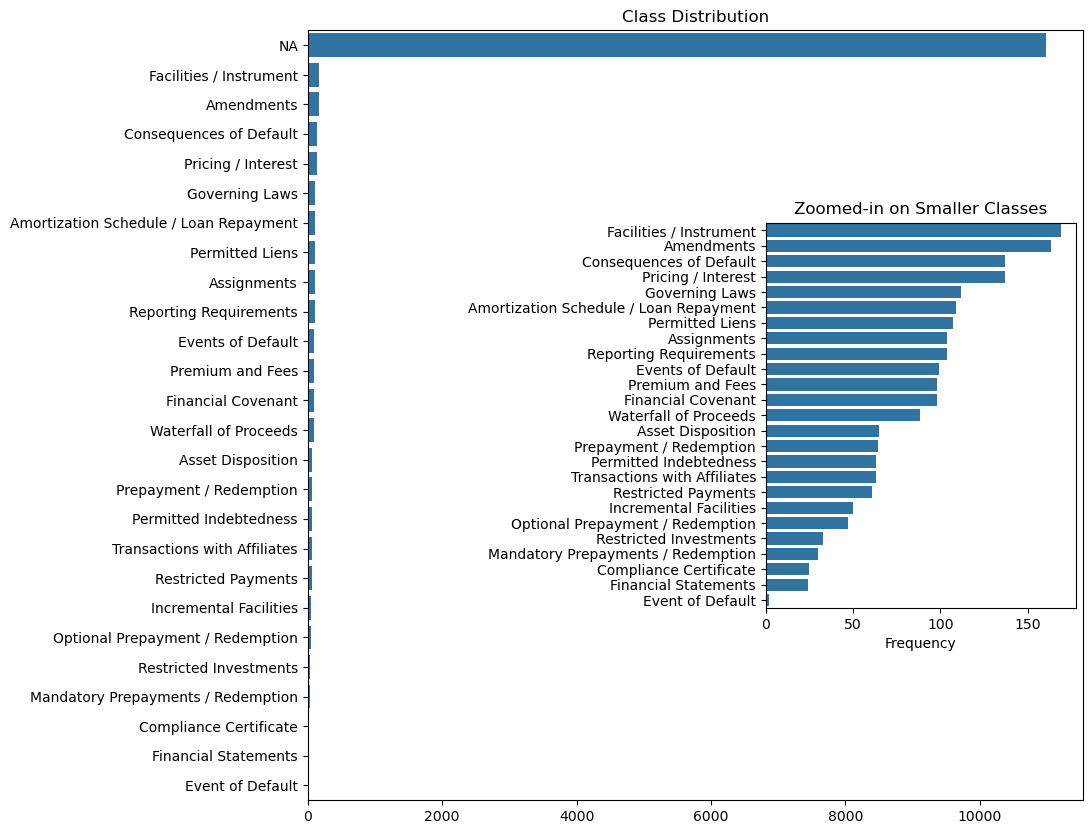

In [113]:
fig, ax = plt.subplots(figsize=(10, 10))

# Main plot with all classes
sns.barplot(y=x, x=y, ax=ax)
ax.set_title('Class Distribution')

# Inset zoom for smaller classes
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
ax_inset = inset_axes(ax, width="40%", height="50%", loc='right')

small_class_values = [v for v in y if v < 1000]
small_class_labels = [k for k, v in zip(x, y) if v < 1000]
sns.barplot(y=small_class_labels, x=small_class_values, ax=ax_inset)
ax_inset.set_title('Zoomed-in on Smaller Classes')
ax_inset.set_xlabel('Frequency')

plt.show()

In [150]:
tag_agg =tag_agg.sort_values(by='freq')

In [183]:
class_counts = {t.tags: t.freq+100 for t in tag_agg.itertuples()}

In [184]:
synthetic_data = {t.tags: t.freq + 500 for t in tag_agg.itertuples()}

/tmp/ipykernel_113/2581964865.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


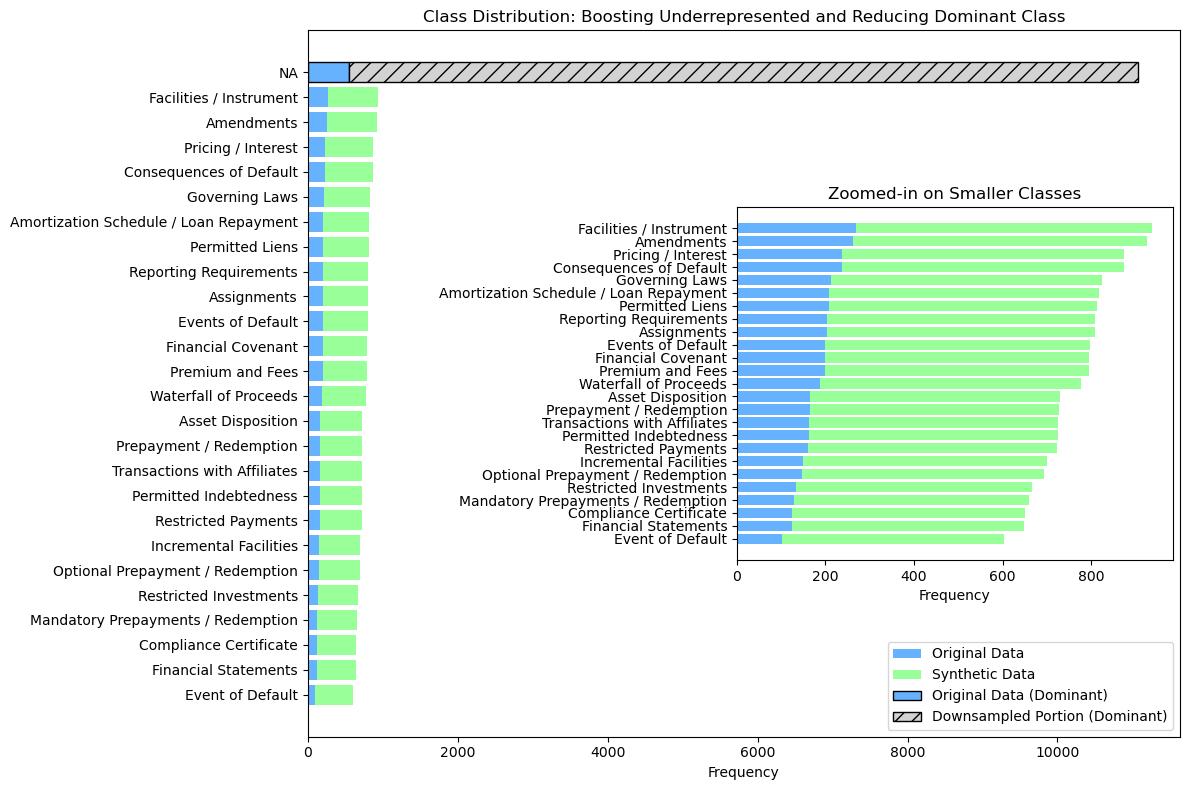

In [190]:

# Stacked bar plot data
original_data = {k: v for k, v in class_counts.items() if k != 'NA'}  # All but dominant class
synthetic_data = {k: synthetic_data.get(k, 0) for k in original_data.keys()}  # Only synthetic counts for underrepresented

fig, ax = plt.subplots(figsize=(12, 8))

# Stacked bar for underrepresented classes
bars1 = ax.barh(list(original_data.keys()), list(original_data.values()), color='#66B2FF', label='Original Data')
bars2 = ax.barh(list(synthetic_data.keys()), list(synthetic_data.values()), left=list(original_data.values()), 
                color='#99FF99', label='Synthetic Data')

# Dominant class with partial faded/dotted section
dominant_class_value = class_counts['NA']  # Full count of Class_A
ax.barh('NA', dominant_class_value * 0.05, color='#66B2FF', label='Original Data (Dominant)', edgecolor='black')  # Showing 70% of the bar
ax.barh('NA', dominant_class_value * 0.95, left=dominant_class_value * 0.05, color='lightgray', hatch='//', 
        edgecolor='black', label='Downsampled Portion (Dominant)')  # Dotted portion for the remaining 30%

# Add labels to each bar (optional)
for bar in bars1 + bars2:
    width = bar.get_width()
    ax.text(width + 10, bar.get_y() + bar.get_height() / 2, f'', ha='center', va='center', color='black')

# Plot details
ax.set_xlabel('Frequency')
ax.set_title('Class Distribution: Boosting Underrepresented and Reducing Dominant Class')
ax.legend()

ax_inset = inset_axes(ax, width="50%", height="50%", loc='right')

small_classes_values = [v for k, v in class_counts.items() if v < 1000]
small_classes_labels = [k for k, v in class_counts.items() if v < 1000]

# Stacked bars in the inset for smaller classes
bars_inset_1 = ax_inset.barh(small_classes_labels, [original_data[k] for k in small_classes_labels], color='#66B2FF')
bars_inset_2 = ax_inset.barh(small_classes_labels, [synthetic_data[k] for k in small_classes_labels], 
                             left=[original_data[k] for k in small_classes_labels], color='#99FF99')

# Inset plot details
ax_inset.set_title('Zoomed-in on Smaller Classes')
ax_inset.set_xlabel('Frequency')

plt.tight_layout()
plt.show()


In [167]:
# Stacked bar plot data
original_data = {k: v for k, v in class_counts.items()}  # All but dominant class
synthetic_data = {k: synthetic_data.get(k, 0) for k in original_data.keys()}  # Only synthetic counts for underrepresented

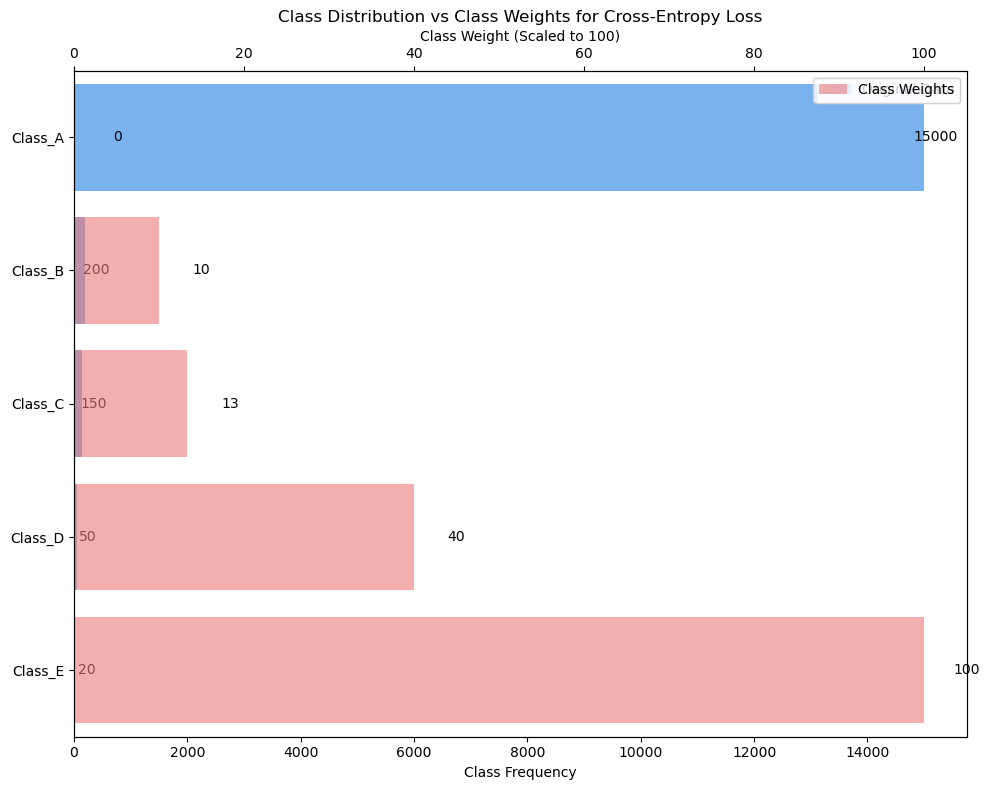

In [191]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Example counts for classes (similar to the previous example)
class_counts = {
    'Class_A': 15000,  # Dominant class
    'Class_B': 200,
    'Class_C': 150,
    'Class_D': 50,
    'Class_E': 20
}

# Calculating weights (inverse of class frequency for illustration)
total_samples = sum(class_counts.values())
weights = {k: total_samples / v for k, v in class_counts.items()}

# Plotting both original counts and weights side by side
fig, ax = plt.subplots(figsize=(10, 8))

# Plot for class distribution
bars1 = sns.barplot(y=list(class_counts.keys()), x=list(class_counts.values()), color='#66B2FF', label='Original Data')

# Plot for weights (normalized for easier visualization)
ax2 = ax.twiny()  # Create a secondary x-axis
bars2 = sns.barplot(y=list(weights.keys()), x=[v/max(weights.values())*100 for v in weights.values()], 
                    color='#FF6666', alpha=0.6, label='Class Weights', ax=ax2)

# Adding labels to each bar
for bar in bars1.patches:
    ax.text(bar.get_width() + 200, 
            bar.get_y() + bar.get_height() / 2, 
            f'{int(bar.get_width())}', 
            ha='center', 
            va='center', 
            color='black')

for bar in bars2.patches:
    ax2.text(bar.get_width() + 5, 
             bar.get_y() + bar.get_height() / 2, 
             f'{int(bar.get_width())}', 
             ha='center', 
             va='center', 
             color='black')

# Titles and labels
ax.set_xlabel('Class Frequency')
ax2.set_xlabel('Class Weight (Scaled to 100)')
ax.set_title('Class Distribution vs Class Weights for Cross-Entropy Loss')
ax.legend(loc='upper right')

plt.tight_layout()
plt.show()
